In [1]:
try:
    output_filepath
except:
    output_filepath = '../data/processed/'

In [2]:
import os
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import networkx as nx

from src.utils.utils_networks import global_efficiency, network_years_generator

In [3]:

financial_efficiency =  [global_efficiency(g) for g in network_years_generator(output_filepath, 'A_country')]
human_efficiency = [global_efficiency(g) for g in network_years_generator(output_filepath, 'migration_network')]

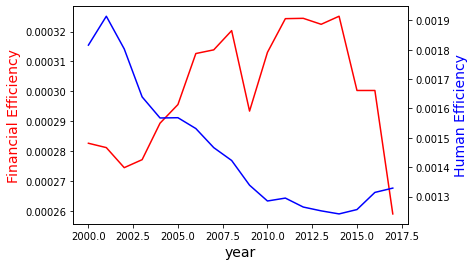

In [8]:
df = pd.DataFrame({'financial_efficiency':financial_efficiency, 
                   'human_efficiency':human_efficiency}, index=range(2000, 2019))
df = df.loc[df.index<2018]

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df.index, df.financial_efficiency, color="red")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Financial Efficiency",color="red",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df.index, df.human_efficiency ,color="blue")
ax2.set_ylabel("Human Efficiency",color="blue",fontsize=14)

save_to = os.path.join(Path(output_filepath).parent.parent.resolve(), 'reports', 'figures', 'networks_efficiency.png')
plt.savefig(save_to)     
plt.show()

In [5]:
df.describe()

,financial_efficiency,human_efficiency
count,19.000000,19.000000
mean,0.000298,0.002207
std,0.000022,0.003257
min,0.000258,0.001241
25%,0.000282,0.001290
50%,0.000300,0.001423
75%,0.000317,0.001604
max,0.000325,0.015627
